In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
file = 'heart_disease.xlsx'
df = pd.read_excel(file)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [3]:
df['num'].value_counts()

num
0    399
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
## rename the num column as target
df = df.rename(columns = {'num': 'Target'})

In [6]:
## checking missing values
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
Target       0
dtype: int64

In [7]:
## handling missing values
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())

In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
Target      0
dtype: int64

In [9]:
## checking duplicated values
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,Target


<Axes: >

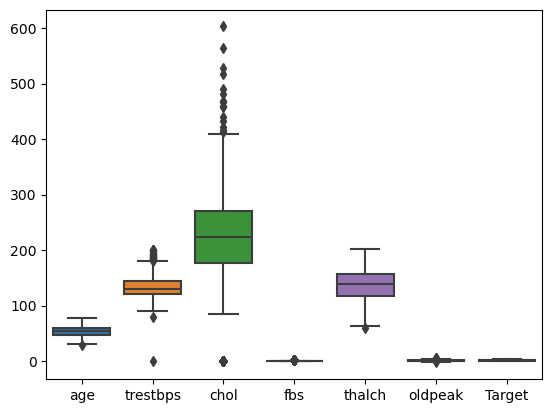

In [10]:
## checking outliers in the dataset using boxplot
sns.boxplot(df)

<Axes: xlabel='Target'>

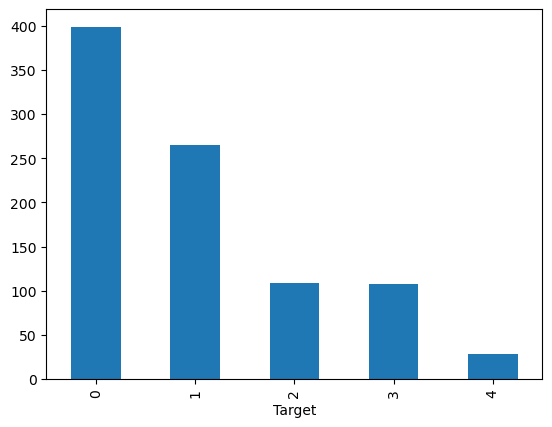

In [11]:
## creating a bar plot for target column to see the distribution
df['Target'].value_counts().plot(kind = 'bar')

from above bar chart representation, we conclude that most of the patient have no hard disease and very rare people are in 4th stage.

In [12]:
## onehot encoding
df = pd.get_dummies(df)

In [13]:
## divide the data into independent and dependent variables
x = df.drop('Target',axis = 1)
y = df['Target']

In [14]:
x

,age,trestbps,chol,fbs,thalch,oldpeak,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,...,exang_False,exang_True,exang_FALSE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.300000,False,True,False,False,...,True,False,False,False,True,False,False,True,False,False
1,41,135,203,False,132,0.000000,False,True,False,True,...,True,False,False,False,False,True,False,True,False,False
2,57,140,192,False,148,0.400000,False,True,True,False,...,True,False,False,False,False,True,False,True,False,False
3,52,118,186,False,190,0.000000,False,True,False,False,...,True,False,False,False,False,True,False,True,False,False
4,57,110,201,False,126,1.500000,False,True,True,False,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,False,120,1.500000,False,True,True,False,...,True,False,False,False,False,False,True,True,False,False
904,62,166,170,False,120,3.000000,False,True,True,False,...,False,True,False,False,False,True,False,False,True,False
905,56,170,0,False,123,2.500000,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False
906,56,144,208,True,105,0.891253,False,True,False,False,...,False,False,False,True,True,False,False,True,False,False


In [15]:
y

0      0
1      0
2      0
3      0
4      0
      ..
903    4
904    4
905    4
906    4
907    4
Name: Target, Length: 908, dtype: int64

In [16]:
## split the data into training and testing part 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state =32)

## model Building

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
classifier = DecisionTreeClassifier()

In [19]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [20]:
y_pred = classifier.predict(x_test)

In [21]:
from sklearn import tree

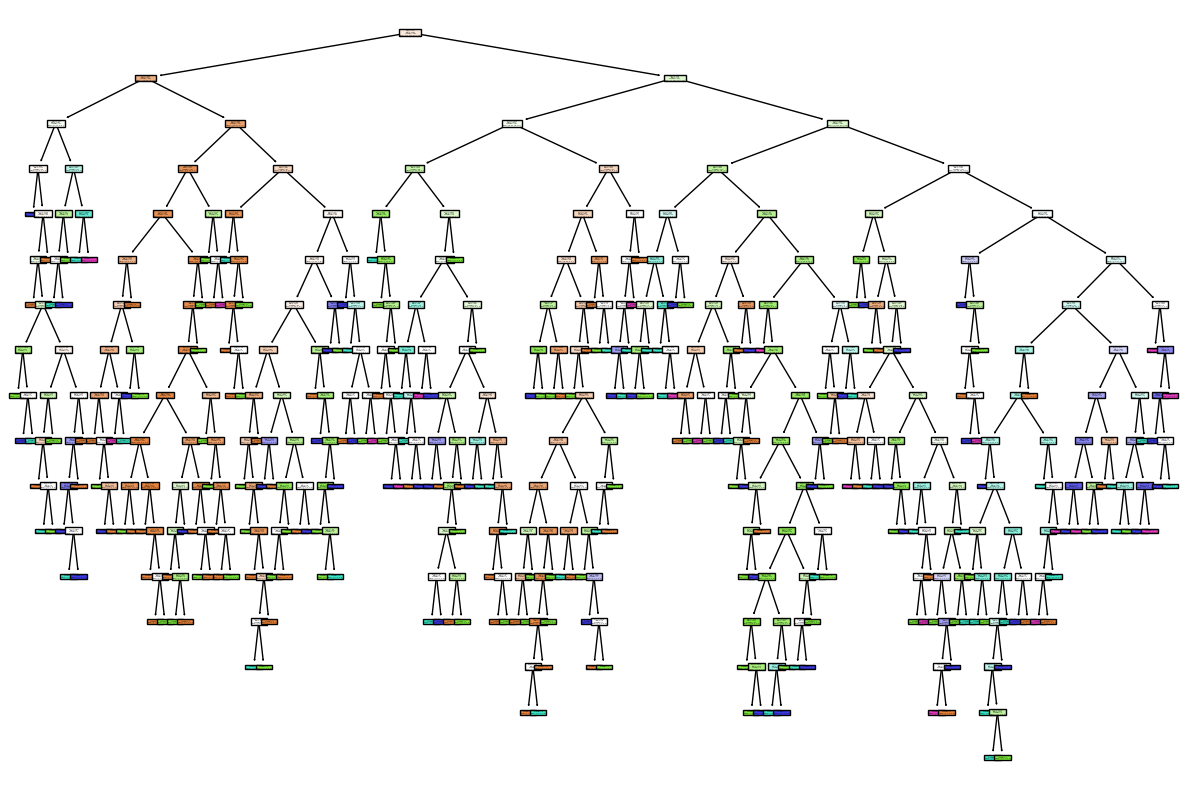

In [22]:
plt.figure(figsize = (15,10))
tree.plot_tree(classifier, filled = True)
plt.show()

#### performance matrix

In [23]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [24]:
print(accuracy_score(y_pred,y_test))

0.46153846153846156


In [25]:
print(confusion_matrix(y_pred,y_test))

[[57 15  6  2  0]
 [22 18 10 11  1]
 [ 6  5  4  2  2]
 [ 2  7  2  4  1]
 [ 0  0  0  4  1]]


In [26]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.66      0.71      0.68        80
           1       0.40      0.29      0.34        62
           2       0.18      0.21      0.20        19
           3       0.17      0.25      0.21        16
           4       0.20      0.20      0.20         5

    accuracy                           0.46       182
   macro avg       0.32      0.33      0.32       182
weighted avg       0.46      0.46      0.46       182



## Hyperparameter Tuning
also known as pre pruining

In [27]:
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    "splitter" : ['best', 'random'],
    'max_depth' : [1,2,3,4,5],
    'max_features' : ['auto','sqrt','log2']
}

In [28]:
## we use GridSearchCV cross validation technique to tune the parameters
from sklearn.model_selection import GridSearchCV

In [29]:
clf = GridSearchCV(classifier, param_grid = parameters, cv = 5, scoring = 'neg_mean_squared_error')

In [30]:
clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [31]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [32]:
y_pred1 = clf.predict(x_test)

In [33]:
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79       101
           1       0.56      0.34      0.42        74
           2       0.05      0.14      0.07         7
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.55       182
   macro avg       0.29      0.24      0.26       182
weighted avg       0.70      0.55      0.61       182



In [34]:
print(accuracy_score(y_pred,y_test))

0.46153846153846156


In [35]:
tree_clf = DecisionTreeClassifier(criterion='log_loss',max_depth = 3,max_features = 'auto',splitter ='best')

In [36]:
tree_clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=3, max_features='auto')

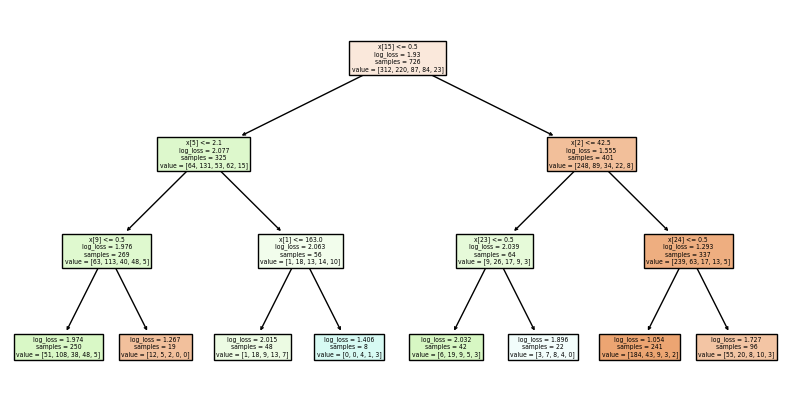

In [37]:
plt.figure(figsize = (10,5))
tree.plot_tree(tree_clf, filled = True)
plt.show()

According to the implementation, we saw that after performing hyperparamter tuning our model's accuracy increased by approx. 10%